## Homework no. 1 example

Use of static calibration curve and estimate of uncertainty.

1. Measure several (at least 3) calibration points and fit a regression line to the calibration curve. 
2. Linear calibration curves are desirable because they result in the best accuracy and precision. If the data is non-linear, try logarithmic approach 
3. A plot of the calibration data and the fitted line should always be examined to check for outliers and to verify linear behavior.

In this example we use the residuals to calculate standard errors of the point estimates. The assumption is that the noise is uniform and random and it's not always a valid one.

### Example 1

Given: The following data was obtained in the analysis of concentration of a solute using spectroscopy.

Required: Following calibration, a sample of concentration was analyzed and the measured transmittance was 35.6%. Report the concentration of analyte in the form of a confidence interval.




In [1]:
import numpy as np
import pylab as pl


In [2]:
# x = np.sort(np.random.rand(5,1)*55)
# y = 

In [3]:
# c = np.array([5.1, 17.0, 25.5, 34.0, 42.5, 51.0 ]) # concentration [ppm]
# T = np.array([78.1, 43.2, 31.4, 18.8, 14.5, 8.7]) # transmittance, [%]
c = np.sort(np.random.rand(6,1)*55,axis=1)
krand = np.random.rand(1)*0.05
T = 100*10**(-(c*krand + krand/10))+np.random.rand(6,1)*10



Text(0, 0.5, '$T$ [%]')

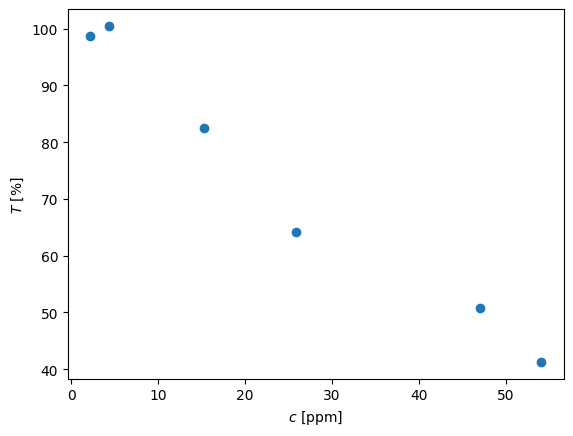

In [4]:
pl.plot(c,T,'o')
pl.xlabel('$c$ [ppm]')
pl.ylabel('$T$ [%]')


First we need to convert the transmittance into absorbance. Absorbance is known to be proportional to concentration.
The translation is according to $a = -log(T/100)$

Text(0, 0.5, '$a$ [a.u.]')

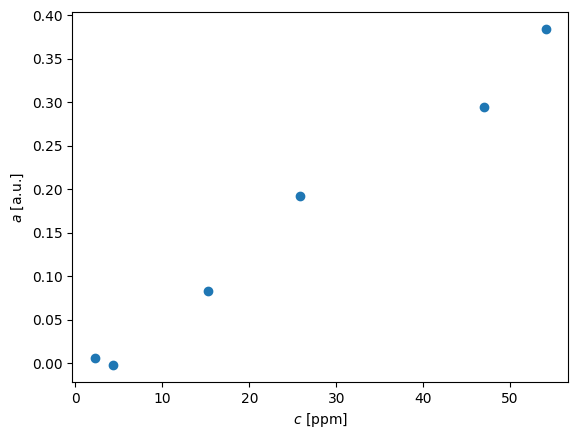

In [5]:
a = -np.log10(T/100)
pl.plot(c,a,'o')
pl.xlabel('$c$ [ppm]')
pl.ylabel('$a$ [a.u.]')

## Regression analysis
Following the recipe of http://www.answermysearches.com/how-to-do-a-simple-linear-regression-in-python/124/

In [6]:
from math import sqrt
# define the new function
def linreg(X, Y):
    """
    Summary
        Linear regression of y = ax + b
    Usage
        real, real, real = linreg(list, list)
    Returns coefficients to the regression line "y=ax+b" from x[] and y[], and R^2 Value
    """
    if len(X) != len(Y):  raise ValueError('unequal length')
    N = len(X)
    Sx = Sy = Sxx = Syy = Sxy = 0.0
    for x, y in zip(X, Y):
        Sx = Sx + x
        Sy = Sy + y
        Sxx = Sxx + x*x
        Syy = Syy + y*y
        Sxy = Sxy + x*y
    det = Sxx * N - Sx * Sx
    a, b = (Sxy * N - Sy * Sx)/det, (Sxx * Sy - Sx * Sxy)/det
    meanerror = residual = 0.0
    for x, y in zip(X, Y):
        meanerror = meanerror + (y - Sy/N)**2
        residual = residual + (y - a * x - b)**2
    RR = 1 - residual/meanerror
    ss = residual / (N-2)
    Var_a, Var_b = ss * N / det, ss * Sxx / det
    #print "y=ax+b"
    #print "N= %d" % N
    #print "a= %g \\pm t_{%d;\\alpha/2} %g" % (a, N-2, sqrt(Var_a))
    #print "b= %g \\pm t_{%d;\\alpha/2} %g" % (b, N-2, sqrt(Var_b))
    #print "R^2= %g" % RR
    #print "s^2= %g" % ss
    return a, b, RR

In [7]:
K,b,RR = linreg(c,a)
print (K,b,RR)

[0.0072289] [-0.01958441] [0.98591391]


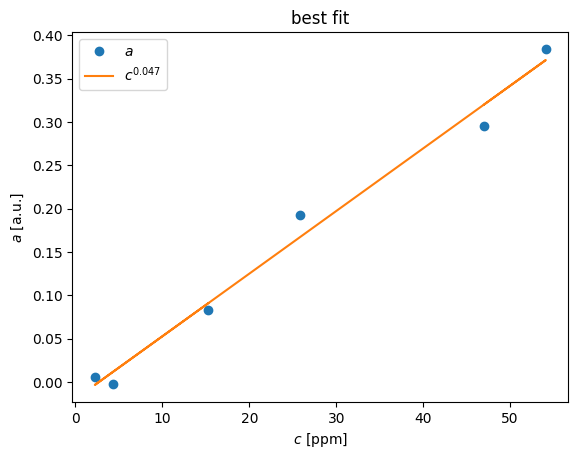

In [8]:
a_est = c*K+b
pl.plot(c,a,'o',c,a_est)
pl.xlabel('$c$ [ppm]')
pl.ylabel('$a$ [a.u.]')
pl.title('best fit')
pl.legend(('$a$','$c^{0.047}$'),loc='best')

Text(0.5, 1.0, 'Deviation plot')

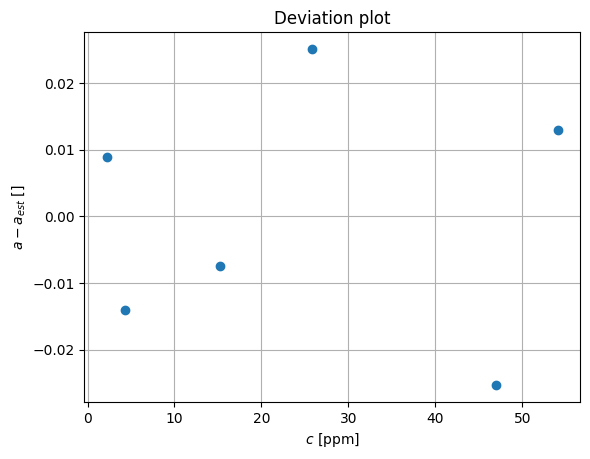

In [9]:
pl.plot(c,a-a_est,'o')
pl.grid(True)
pl.xlabel('$c$ [ppm]')
pl.ylabel('$a - a_{est}$ []')
pl.title('Deviation plot')


Now we estimate the value from the measurement, using calibration curve


In [10]:
T1 = 35.6# percent transmittance
a1 = -np.log10(T1/100)
# a = c*0.047+0.0115
c1 = (a1 - b)/K
print (c1)

[64.75876166]


Now we can assuming random white noise estimate the confidence level:

In [11]:
dev = a-a_est
print (dev)
stdev = np.mean(dev**2)**0.5

print( "We can estimate the concentration of the sample as: %6.4f with uncertainty %6.4f" % (c1, stdev))

[[-0.0252819 ]
 [ 0.01287598]
 [ 0.02508792]
 [ 0.00892554]
 [-0.01410011]
 [-0.00750742]]
We can estimate the concentration of the sample as: 64.7588 with uncertainty 0.0172


More accurate assessment of uncertainty is using the t-distribution and updated standard deviation for small samples, we learn it later.


In [12]:
Sxx = 5*np.var(c)
cmean = np.mean(c)
stdev1 = stdev/K*np.sqrt(1+ 1.0/6.0 + ((c1-cmean)**2)/(5*Sxx) )
t = 2.7764 # for 97.5% confidence interval and 5 samples (n-1)
print ("We can estimate the concentration of the sample as: %6.4f with uncertainty %6.4f" % (c1, stdev1*t))

We can estimate the concentration of the sample as: 64.7588 with uncertainty 7.6013
